#### Imports<a name="imports"></a>

In [1]:
import pandas as pd
import numpy as np

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# sklearn regressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV

### Housing Prices with Ames Data Set

1. [Imports](#imports)
2. [Data](#data)
3. [Exploratory Analysis](#explore)   
4. [Data Cleaning](#clean)
5. [Feature Engineering](#engineer)
6. [Algorithm Selection](#select)
6. [Hyperparameter Tuning](#tune)
7. [Model Training](#train)

#### Exploratory Analysis

Start with Basics

Context of Data

Plot Numerical Distributions

Plot Categorical Distributions

Plot Segmentations

Study Correlations

In [6]:
dct = {'mssub':'sub', 'mszoning':'znng', 'mssub':'sub', '1st':'frst', '2nd':'scnd','exterior2nd':'extr_scnd',
      'exter':'extr', }
df.columns = [label_uncap_split(col,dct) for col in df.columns]

In [7]:
df.columns

Index(['id', 'sub_class', 'znng', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition1', 'condition2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'roof_style', 'roof_matl', 'exterior1st',
       'exterior2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmt_fin_type1', 'bsmt_fin_sf1', 'bsmt_fin_type2', 'bsmt_fin_sf2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abv_gr', 'kitchen_abv_gr', 'kitchen_qual',
       'tot_rms_abv_grd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garag

### Data<a name="data"></a>

In [3]:
file = 'AmesHousing/Data/train.csv'
df = pd.read_csv(file) 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
#df.columns
#df.dtypes
#df.describe()
#uniq = {col:len(df[col].unique()) for col in df if col in col_obj}
#df.loc[np.where(df.mas_vnr_area.isna())]

In [7]:
# remove nan for plotting
col_obj = [col for col in dfn if pd.api.types.is_object_dtype(dfn[col])]
col_num = [col for col in dfn if not col in col_obj]
col_nan = [col for col in dfn if dfn[col].isna().any()]
col_onn =  set(col_obj) & set(col_nan)
col_fnn =  set(col_num) & set(col_nan)
col_nnn =  set(col_nan) - set(col_onn)
for col in col_obj:
    dfn[col] = dfn[col].fillna('NA')
for col in col_fnn:
    dfn[col] = dfn[col].fillna(0)

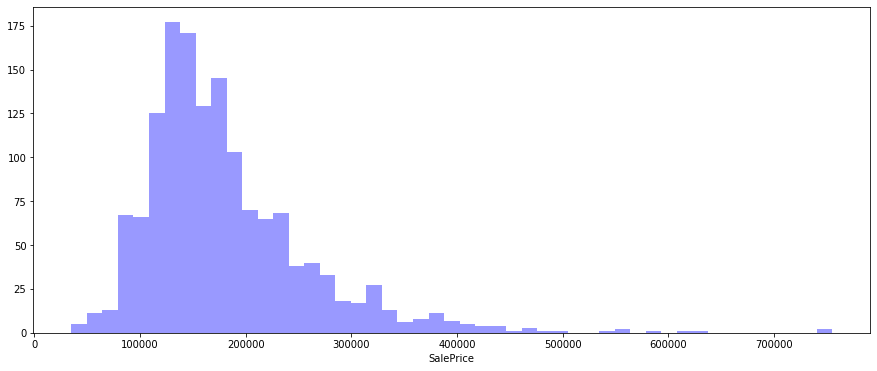

In [8]:
f, ax = plt.subplots(figsize=(15,6))
sns.distplot(df.SalePrice, color="b", kde = False,  ax=ax)
plt.show()

#### Exploratory Analysis<a name="explore"></a>
*Context of Data*

*Start with Basics*
- object data type features all have ok number of unique values
- NaN values are where home does not have feature such as pool_area for homes with no pool


Plot Numerical Distributions

Plot Categorical Distributions

Plot Segmentations

Study Correlations


In [8]:
plot1 = [col for col in col_obj if (len(dfn[col].unique()) <= 8)]
plot2 = [col for col in col_obj if (len(dfn[col].unique()) > 8)]
plot2 = ['condition1', 'exterior1st', 'exterior2nd', 'sale_type']

In [ ]:
cols = 1
rows = len(plot2) // cols 
fig, axs = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=(16, rows * 5))

for i in range( rows ):
        sns.barplot(x=plot2[i], y="sale_price", data=dfn, ax=axs[i])     
plt.show()

In [ ]:
cols = 2
rows = len(plot1) // cols 
fig, axs = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=(16, rows * 4))
i = 0
for x in range(rows):
    for y in range(cols):
        sns.barplot(x=plot1[i], y="sale_price", data=dfn, ax=axs[x][y])     
        i += 1
plt.show()

In [ ]:
#uniq = {col:len(dfn[col].unique()) for col in dfn if col in col_obj}
#dfn.loc[np.where(dfn.mas_vnr_area.isna())]


In [ ]:
f, ax = plt.subplots(figsize=(16, 24))
sns.barplot(x="sale_price", y='neighborhood', data=dfn, orient='h', ax=ax)  
plt.show()

#### Data Cleaning<a name="clean"></a>
 - Remove Unwanted observations
 - Fix Structural Errors
 - Filter Unwanted Outliers
 - Handle Missing Data

In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
col_obj = [col for col in dfn if pd.api.types.is_object_dtype(dfn[col])]
col_num = [col for col in dfn if not col in col_obj]
col_nan = [col for col in dfn if dfn[col].isna().any()]
col_onn =  set(col_obj) & set(col_nan)
col_fnn =  set(col_num) & set(col_nan)
col_nnn =  set(col_nan) - set(col_onn)
for col in col_obj:
    dfn[col] = dfn[col].fillna('NA')
for col in col_fnn:
    dfn[col] = dfn[col].fillna(0)

#### Feature Engineering<a name="engineer"></a>
 **transform target**

 
**Infuse Domain Knowledge**

**Create Interaction Features**
 
**Combine Sparse Classes**

**Add Dummy Variables**


**Remove Unused Features**

#### Algorithm Selection <a name="select"></a>

#### Hyperparameter Selection<a name="tune"></a>


#### Model Training<a name="train"></a>

In [ ]:
df1.tail()

In [ ]:
df1.baths = df1.baths * 2  + df1.halfbath
df1.flrsf = df1.flrsf + df1.twofloor
df1.drop(['twofloor', 'halfbath', 'functional',], axis=1, inplace=True)

In [4]:
def label_uncap_split (string, dict):
    S = []   
    for (i,c) in enumerate(string): 
        if not i:
            sub = c.lower(); c = ''; prv_upr = True
        else:
            if c.isupper():
                    if prv_upr:
                        prv_upr = True
                    else:
                        S.append(sub); sub = c.lower() ; c = ''; prv_upr = True
            else:
                prv_upr = False                
            sub += c.lower()
        if (i + 1 == len(string)):  
            S.append(sub)
        for (i, s) in enumerate(S):
            if s in dict:
                S[i] = dict[s]     
    return '_'.join(S)


In [ ]:
dct_exd = {'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5}
#dct_fcl = {'Sal':0,'Sev':25,'Maj2':50,'Maj1':65,'Mod':80,'Min2':90,'Min1':95,'Typ':100}
dct_nbd = {hood:i for (i,hood) in enumerate(df1.groupby('neighborhood').saleprice.mean().sort_values().index)}
dct_mss = {subclass:i for (i,subclass) in enumerate(df1.groupby('mssubclass').saleprice.mean().sort_values().index)}

In [ ]:
df1.extercond = df1.extercond.map( dct_exd) 
#df1.functional = df1.functional.map( dct_fcl)
df1.neighborhood = df1.neighborhood.map( dct_nbd)
df1.mssubclass = df1.mssubclass.map(dct_mss)

In [ ]:
# dff only has features
dff = df1.iloc[:,:-1]
#dfj
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(dff.shape)), columns=dff.columns)
dfj = dff.add(jitter)
dfj.head()

In [ ]:
dff = dff.astype(float)

In [ ]:
corr1 = dff.corr()
print(corr1)
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr1, vmax=.8, square=True)
plt.show()

In [ ]:
# x is features values and y is target values
x = dff.values; y = df1.saleprice.values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=5)
pcomps = pca.fit_transform(x)
np.sum(pca.explained_variance_ratio_)

In [ ]:
pcs = pd.DataFrame(data = pcomps, columns = ['pca' + str(i) for i in range(1,6)])
psf = pd.concat([pcs, df1.saleprice], axis = 1)
psf.head()

In [ ]:
price_range = [int(np.percentile(df1.saleprice, i)) for i in range(0,110,10)]
psf['price_cat']   = pd.cut(df1.saleprice, price_range, labels=False, include_lowest=True)

In [ ]:
g = sns.PairGrid(data=psf, vars=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'], hue="price_cat", palette="muted" )
g = g.map(plt.scatter)
g.add_legend()
plt.show()



In [ ]:
f, ax = plt.subplots(figsize=(12, 9)) 
ax = sns.scatterplot(x="pc1", y="pc2",  hue="price_cat",  data=psf)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(12, 9)) 
ax = sns.scatterplot(x="pc3", y="pc4", hue="price_cat",  data=psf)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(12, 9)) 
ax = sns.scatterplot(x="pc1", y="pc5", hue="price_cat",  data=psf)
plt.show()

In [ ]:
# x is features values and y is target values
x = dff.values; y = df1.saleprice.values
x = StandardScaler().fit_transform(x)
pca = PCA(0.90)



In [ ]:
pcomps = pca.fit_transform(x)
pcs2 = pd.DataFrame(data = pcomps, columns = ['pc' + str(i) for i in range(1,n + 1)])
psf2 = pd.concat([pcs, df1.saleprice], axis = 1)
psf.head()